In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import the data

In [2]:
#Import trainning set and public testset
df = pd.read_csv('train.csv', index_col=0)
public_test = pd.read_csv('test-pub.csv', index_col=0)

#Get categorical and numerical col list
categorical = [key for key in df.keys() if df[key].dtype == 'O']
numerical = [key for key in df.keys() if df[key].dtype != 'O']

#Remove space at the start or end of string
for col in categorical:
    df[col] = df[col].apply(lambda x: x.strip())

#Replace all ? by NaN value    
df.replace({'?': np.NaN}, regex=False, inplace=True)

#Format public_test set
categorical_test = [key for key in public_test.keys() if public_test[key].dtype == 'O']
for col in categorical_test:
    public_test[col] = public_test[col].apply(lambda x: x.strip())
public_test.replace({'?': np.NaN}, regex=False, inplace=True)

# Data Exploration

In [3]:
#Make a copy for data exploration
data = df.copy()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38000 entries, 40947 to 17408
Data columns (total 15 columns):
Age                    38000 non-null int64
Employment class       35804 non-null object
Fnlwgt                 38000 non-null int64
Education level        38000 non-null object
Education years        38000 non-null int64
Marital status         38000 non-null object
Occupation             35796 non-null object
Relationship status    38000 non-null object
Race                   38000 non-null object
Sex                    38000 non-null object
Capital gain           38000 non-null int64
Capital loss           38000 non-null int64
Work hours per week    38000 non-null int64
Native country         37320 non-null object
Salary                 38000 non-null object
dtypes: int64(6), object(9)
memory usage: 4.6+ MB


In [5]:
data.head()

,Age,Employment class,Fnlwgt,Education level,Education years,Marital status,Occupation,Relationship status,Race,Sex,Capital gain,Capital loss,Work hours per week,Native country,Salary
ID,,,,,,,,,,,,,,,
40947,50,Private,104729,HS-grad,9,Divorced,Machine-op-inspct,Other-relative,White,Female,0,0,48,United-States,<=50K
17139,27,Private,138705,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,53,United-States,<=50K
29557,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,NaN,<=50K
10344,40,Private,181015,HS-grad,9,Separated,Other-service,Unmarried,White,Female,0,0,47,United-States,<=50K
33206,52,Private,110563,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K


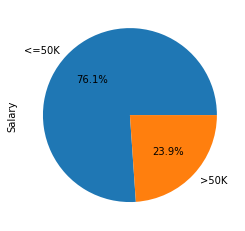

In [6]:
fre = data['Salary'].value_counts()
fre = (fre / 38000) * 100
fre.plot(kind='pie', autopct='%.1f%%')

In [7]:
data['Education level'].value_counts()

HS-grad         12303
Some-college     8658
Bachelors        6188
Masters          1911
Assoc-voc        1652
11th             1316
Assoc-acdm       1240
10th             1125
7th-8th           740
Prof-school       650
9th               594
12th              501
Doctorate         491
5th-6th           381
1st-4th           198
Preschool          52
Name: Education level, dtype: int64

In [8]:
data['Education years'].value_counts()

9     12303
10     8658
13     6188
14     1911
11     1652
7      1316
12     1240
6      1125
4       740
15      650
5       594
8       501
16      491
3       381
2       198
1        52
Name: Education years, dtype: int64

# Data Preparation

In [9]:
# Shuffling the Data Set
from sklearn.utils import shuffle
df = shuffle(df, random_state=0)

#Remove Salary col from the trainning set
X = df.drop(['Salary'], axis = 1)
y = df['Salary']

#Split data into train set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=0)

In [10]:
X_train.head()

,Age,Employment class,Fnlwgt,Education level,Education years,Marital status,Occupation,Relationship status,Race,Sex,Capital gain,Capital loss,Work hours per week,Native country
ID,,,,,,,,,,,,,,
35648,46,Private,125492,Bachelors,13,Divorced,Prof-specialty,Not-in-family,Black,Female,0,0,40,United-States
32246,22,NaN,31102,Some-college,10,Never-married,NaN,Own-child,Asian-Pac-Islander,Female,0,0,4,South
44588,65,Private,143554,Some-college,10,Separated,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States
31907,47,Local-gov,162187,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,1887,40,United-States
47579,36,Self-emp-not-inc,28738,Assoc-acdm,12,Divorced,Sales,Unmarried,White,Female,0,0,35,United-States


## Data cleaning

In [11]:
#Filling missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)
public_test_imputed = pd.DataFrame(imputer.transform(public_test), columns=public_test.columns, index=public_test.index)

In [12]:
X_train_imputed

,Age,Employment class,Fnlwgt,Education level,Education years,Marital status,Occupation,Relationship status,Race,Sex,Capital gain,Capital loss,Work hours per week,Native country
ID,,,,,,,,,,,,,,
35648,46,Private,125492,Bachelors,13,Divorced,Prof-specialty,Not-in-family,Black,Female,0,0,40,United-States
32246,22,Private,31102,Some-college,10,Never-married,Craft-repair,Own-child,Asian-Pac-Islander,Female,0,0,4,South
44588,65,Private,143554,Some-college,10,Separated,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States
31907,47,Local-gov,162187,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,1887,40,United-States
47579,36,Self-emp-not-inc,28738,Assoc-acdm,12,Divorced,Sales,Unmarried,White,Female,0,0,35,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13345,39,Self-emp-not-inc,331481,Bachelors,13,Divorced,Craft-repair,Not-in-family,Black,Male,0,1669,60,United-States
33981,37,Private,143058,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
4467,52,Local-gov,236497,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States


## Feature selection

In [13]:
#Drop redundant columns
def drop_edu(*data):
  for df in data:
    df.drop(['Education level'], axis=1, inplace=True)

drop_edu(X_train_imputed, X_test_imputed, public_test_imputed)

In [14]:
X_train_imputed

,Age,Employment class,Fnlwgt,Education years,Marital status,Occupation,Relationship status,Race,Sex,Capital gain,Capital loss,Work hours per week,Native country
ID,,,,,,,,,,,,,
35648,46,Private,125492,13,Divorced,Prof-specialty,Not-in-family,Black,Female,0,0,40,United-States
32246,22,Private,31102,10,Never-married,Craft-repair,Own-child,Asian-Pac-Islander,Female,0,0,4,South
44588,65,Private,143554,10,Separated,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States
31907,47,Local-gov,162187,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,1887,40,United-States
47579,36,Self-emp-not-inc,28738,12,Divorced,Sales,Unmarried,White,Female,0,0,35,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13345,39,Self-emp-not-inc,331481,13,Divorced,Craft-repair,Not-in-family,Black,Male,0,1669,60,United-States
33981,37,Private,143058,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
4467,52,Local-gov,236497,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States


## Feature engineering

In [15]:
categorical_train = ['Employment class', 'Marital status', 'Occupation', 'Relationship status', 'Race', 'Sex', 'Native country']
X_train_imputed[categorical_train].describe()

,Employment class,Marital status,Occupation,Relationship status,Race,Sex,Native country
count,26600,26600,26600,26600,26600,26600,26600
unique,8,7,14,6,5,2,41
top,Private,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
freq,20018,12151,5025,10694,22729,17762,24340


In [16]:
#Get list of country have > 100 samples
country_count = X['Native country'].value_counts()
large_country = [key for key in country_count.keys() if country_count[key] > 100]

#Change all country have < 100 samples to Other
def map_country(*data):
  for df in data:
    df['Native country'] = df['Native country'].apply(lambda x: x if x in large_country else 'Other')

map_country(X_train_imputed, X_test_imputed, public_test_imputed)

In [17]:
#Label encoder
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
label_X_train = X_train_imputed.copy()
label_X_test = X_test_imputed.copy()
label_pub_test = public_test_imputed.copy()
for col in categorical_train:
    label_X_train[col] = lb.fit_transform(label_X_train[col])
    label_X_test[col] = lb.transform(label_X_test[col])
    label_pub_test[col] = lb.transform(label_pub_test[col])
    

In [18]:
#Onehot encode
from sklearn.preprocessing import OneHotEncoder
oh_encode = OneHotEncoder(handle_unknown='ignore', sparse=False)

#Apply onehot encode with each categorical columns
OH_cols_train = pd.DataFrame(oh_encode.fit_transform(X_train_imputed[categorical_train]), index=X_train_imputed.index)
OH_cols_test = pd.DataFrame(oh_encode.transform(X_test_imputed[categorical_train]), index=X_test_imputed.index)
OH_cols_public_test = pd.DataFrame(oh_encode.transform(public_test_imputed[categorical_train]), index=public_test_imputed.index)

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train_imputed.drop(categorical_train, axis=1)
num_X_test = X_test_imputed.drop(categorical_train, axis=1)
num_public_test = public_test_imputed.drop(categorical_train, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)
OH_public_test = pd.concat([num_public_test, OH_cols_public_test], axis=1)

## Feature scaling

In [19]:
OH_X_train

,Age,Fnlwgt,Education years,Capital gain,Capital loss,Work hours per week,0,1,2,3,...,42,43,44,45,46,47,48,49,50,51
ID,,,,,,,,,,,,,,,,,,,,,
35648,46,125492,13,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32246,22,31102,10,0,0,4,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
44588,65,143554,10,0,0,38,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31907,47,162187,10,0,1887,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
47579,36,28738,12,0,0,35,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13345,39,331481,13,0,1669,60,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33981,37,143058,10,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4467,52,236497,13,0,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Normalize all numerical attributes using StandardScaler
scaled_cols_train_lb = pd.DataFrame(scaler.fit_transform(label_X_train[numerical]), index=label_X_train.index, columns=numerical)
scaled_cols_test_lb = pd.DataFrame(scaler.transform(label_X_test[numerical]), index=label_X_test.index, columns=numerical)
scaled_cols_pub_lb = pd.DataFrame(scaler.transform(label_pub_test[numerical]), index=label_pub_test.index, columns=numerical)

#Remove numerical cols
cat_X_train_label = label_X_train.drop(numerical, axis=1)
cat_X_test_label = label_X_test.drop(numerical, axis=1)
cat_pub_test_label = label_pub_test.drop(numerical, axis=1)

#Add scaled cols to one-hot features
final_X_train_label = pd.concat([cat_X_train_label, scaled_cols_train_lb], axis=1)
final_X_test_label = pd.concat([cat_X_test_label, scaled_cols_test_lb], axis=1)
final_pub_test_label = pd.concat([cat_pub_test_label, scaled_cols_pub_lb], axis=1)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Normalize all numerical attributes using StandardScaler
scaled_cols_train = pd.DataFrame(scaler.fit_transform(label_X_train[numerical]), index=OH_X_train.index, columns=numerical)
scaled_cols_test = pd.DataFrame(scaler.transform(OH_X_test[numerical]), index=OH_X_test.index, columns=numerical)
scaled_cols_pub = pd.DataFrame(scaler.transform(OH_public_test[numerical]), index=OH_public_test.index, columns=numerical)

#Remove numerical cols
cat_X_train = OH_X_train.drop(numerical, axis=1)
cat_X_test = OH_X_test.drop(numerical, axis=1)
cat_pub_test = OH_public_test.drop(numerical, axis=1)

#Add scaled cols to one-hot features
final_X_train = pd.concat([cat_X_train, scaled_cols_train], axis=1)
final_X_test = pd.concat([cat_X_test, scaled_cols_test], axis=1)
final_pub_test = pd.concat([cat_pub_test, scaled_cols_pub], axis=1)

In [22]:
final_X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,Age,Fnlwgt,Education years,Capital gain,Capital loss,Work hours per week
ID,,,,,,,,,,,,,,,,,,,,,
35648,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.545057,-0.605137,1.148386,-0.146805,-0.215815,-0.042684
32246,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,-1.208478,-1.500000,-0.028946,-0.146805,-0.215815,-2.957261
44588,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.933273,-0.433900,-0.028946,-0.146805,-0.215815,-0.204605
31907,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.618121,-0.257251,-0.028946,-0.146805,4.496341,-0.042684
47579,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,-0.185583,-1.522412,0.755942,-0.146805,-0.215815,-0.447486


In [23]:
final_X_train_label

,Employment class,Marital status,Occupation,Relationship status,Race,Sex,Native country,Age,Fnlwgt,Education years,Capital gain,Capital loss,Work hours per week
ID,,,,,,,,,,,,,
35648,3,0,9,1,2,0,9,0.545057,-0.605137,1.148386,-0.146805,-0.215815,-0.042684
32246,3,4,2,3,1,0,6,-1.208478,-1.500000,-0.028946,-0.146805,-0.215815,-2.957261
44588,3,5,0,1,4,0,9,1.933273,-0.433900,-0.028946,-0.146805,-0.215815,-0.204605
31907,1,2,13,0,4,1,9,0.618121,-0.257251,-0.028946,-0.146805,4.496341,-0.042684
47579,5,0,11,4,4,0,9,-0.185583,-1.522412,0.755942,-0.146805,-0.215815,-0.447486
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13345,5,0,2,1,2,1,9,0.033609,1.347739,1.148386,-0.146805,3.951959,1.576526
33981,3,2,2,0,4,1,9,-0.112519,-0.438603,-0.028946,-0.146805,-0.215815,-0.042684
4467,1,2,12,0,4,1,9,0.983441,0.447244,1.148386,-0.146805,-0.215815,-0.042684


In [24]:
# from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import RandomForestClassifier

## NO different between scale and non-scale.

# scaled_scores = cross_val_score(RandomForestClassifier(), final_X_train, y_train, scoring='roc_auc', cv=10)
# print(scaled_scores.mean())

# label_scores = cross_val_score(RandomForestClassifier(), final_X_train_label, y_train, scoring='roc_auc', cv=10)
# print(label_scores.mean())

# non_scaled_scores = cross_val_score(RandomForestClassifier(), OH_X_train, y_train, scoring='roc_auc', cv=10)
# print(non_scaled_scores.mean())

# # No drop NA, Group native country: AUC=0.9558608827029674
# # Without group native country: AUC=0.954621275216564
# # Dropna: AUC=0.9549204964948361
# # LabelEncoder: AUC=0.9563868456298046

# # Label Encoder with grouped-country perform better than Onehot Encoding

In [25]:
# from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import RandomForestClassifier

# capital = final_X_train_label.copy()

# capital['Capital'] = capital['Capital gain'] - capital['Capital loss']
# capital.drop(['Capital gain', 'Capital loss'], inplace=True, axis=1)

# cap_scores = cross_val_score(RandomForestClassifier(random_state=0), capital, y_train, scoring='roc_auc', cv=10)
# print(cap_scores.mean())

# scores = cross_val_score(RandomForestClassifier(random_state=0), final_X_train_label, y_train, scoring='roc_auc', cv=10)
# print(scores.mean())

# Without combine Capital gain and Capital loss perform better

# Model selection

## Logistic Regression

In [26]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score

# crossval_scores = cross_val_score(LogisticRegression(), final_X_train_label, y_train, scoring='roc_auc', cv=10)
# crossval_scores.mean()

# #AUC = 0.9072591869371124

## Decision Tree

In [27]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import cross_val_score

# crossval_scores = cross_val_score(DecisionTreeClassifier(), final_X_train, y_train, scoring='roc_auc', cv=10)
# crossval_scores.mean()

# #AUC = 0.8811154402052835

## kNN

In [28]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import cross_val_score

# crossval_scores = cross_val_score(KNeighborsClassifier(), final_X_train, y_train, scoring='roc_auc', cv=10)
# crossval_scores.mean()

# #AUC = 0.8988590115126802

## Random Forest

In [29]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import cross_val_score

# crossval_scores = cross_val_score(RandomForestClassifier(random_state=0), final_X_train, y_train, scoring='roc_auc', cv=10)
# crossval_scores.mean()

# #AUC = 0.9687706389665667

## Support Vector Machine

In [30]:
# from sklearn.svm import LinearSVC
# from sklearn.model_selection import cross_val_score

# crossval_scores = cross_val_score(LinearSVC(), final_X_train, y_train, scoring='roc_auc', cv=10)
# crossval_scores.mean()

# #AUC = 0.9070367412379337

## Neural Network

In [31]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import cross_val_score

# crossval_scores = cross_val_score(MLPClassifier(), final_X_train, y_train, scoring='roc_auc', cv=10)
# crossval_scores.mean()

# #AUC = 0.9281258243390818

*Random Forest and Neural Network are the best models that I cound find*

# Model tuning

## Random Forest

### Random Search

In [32]:
final_X_train_label

,Employment class,Marital status,Occupation,Relationship status,Race,Sex,Native country,Age,Fnlwgt,Education years,Capital gain,Capital loss,Work hours per week
ID,,,,,,,,,,,,,
35648,3,0,9,1,2,0,9,0.545057,-0.605137,1.148386,-0.146805,-0.215815,-0.042684
32246,3,4,2,3,1,0,6,-1.208478,-1.500000,-0.028946,-0.146805,-0.215815,-2.957261
44588,3,5,0,1,4,0,9,1.933273,-0.433900,-0.028946,-0.146805,-0.215815,-0.204605
31907,1,2,13,0,4,1,9,0.618121,-0.257251,-0.028946,-0.146805,4.496341,-0.042684
47579,5,0,11,4,4,0,9,-0.185583,-1.522412,0.755942,-0.146805,-0.215815,-0.447486
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13345,5,0,2,1,2,1,9,0.033609,1.347739,1.148386,-0.146805,3.951959,1.576526
33981,3,2,2,0,4,1,9,-0.112519,-0.438603,-0.028946,-0.146805,-0.215815,-0.042684
4467,1,2,12,0,4,1,9,0.983441,0.447244,1.148386,-0.146805,-0.215815,-0.042684


In [34]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestClassifier

# random_params = {
#     'n_estimators': np.arange(100, 1000, 100),
#     'max_features': np.arange(1,13,1),
#     'max_depth': np.arange(1,100,10),
#     'min_samples_leaf': np.arange(2, 20, 2)
# }

# random_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=random_params, scoring='roc_auc', cv=3, verbose=1, n_jobs=-1)
# random_rf.fit(final_X_train_label, y_train)

# # BEST PARAMS: {'n_estimators': 700, 'min_samples_leaf': 4, 'max_features': 7, 'max_depth': 21}
# # BEST SCORE(AUC): 0.9435134241067014

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [35]:
# print(random_rf.best_params_)
# print(random_rf.best_score_)

{'n_estimators': 700, 'min_samples_leaf': 4, 'max_features': 7, 'max_depth': 21}
0.9435134241067014


### Grid Search

In [53]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# grid_params = {
#     'max_depth': np.arange(32, 41, 1),
# }

# grid_rf = GridSearchCV(RandomForestClassifier(n_estimators=500, max_features=1, min_samples_leaf=1), param_grid=grid_params, scoring='roc_auc', cv=3, verbose=1, n_jobs=-1)
# grid_rf.fit(final_X_train_label, y_train)

# # Round 1
# # {'max_depth': 32, 'max_features': 7, 'min_samples_leaf': 3, 'n_estimators': 650}
# # 0.9479265032171531

# # Round 2
# # {'min_samples_leaf': 1, 'n_estimators': 500}
# # 0.9574629512339712

# # Round 3
# # {'max_features': 1}
# # 0.9607632313047053


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=1,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=500, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='warn',

In [52]:
# print(grid_rf.best_params_)
# print(grid_rf.best_score_)

# #If the best params at the boundary rerun the Grid Search with different set

{'max_depth': 32}
0.9606034303558438


When I optimize RandomForest with OH encode in GG Colab

Best params: {'max_depth': 33, 'max_features': 38, 'min_samples_leaf': 5, 'n_estimators': 450}

Best scores: 0.9427854293657832 (3-fold cv)

Now I try another validation for 2 types of preprocessing

In [50]:
# from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import RandomForestClassifier

# # OH_rf = RandomForestClassifier(n_estimators=450, min_samples_leaf=5, max_features=38, max_depth=33, random_state=0)
# # OH_rf_scores = cross_val_score(OH_rf, final_X_train, y_train, scoring='roc_auc', cv=10)
# # print(OH_rf_scores.mean())
# # #0.9513542052909475

# label_rf = RandomForestClassifier(n_estimators=500, min_samples_leaf=1, max_features=1, max_depth=32, random_state=0)
# label_rf_scores = cross_val_score(label_rf, final_X_train_label, y_train, scoring='roc_auc', cv=10)
# print(label_rf_scores.mean())
# #0.970799779368094
# #0.9685100218479434
# #0.9718105193585481

0.9718105193585481


LabelEncoder works better than OneHotEncoder

Best params: n_estimators=500, min_samples_leaf=1, max_features=1, max_depth=32

# Model evaluating

In [48]:
final_X_train_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26600 entries, 35648 to 47727
Data columns (total 13 columns):
Employment class       26600 non-null int64
Marital status         26600 non-null int64
Occupation             26600 non-null int64
Relationship status    26600 non-null int64
Race                   26600 non-null int64
Sex                    26600 non-null int64
Native country         26600 non-null int64
Age                    26600 non-null float64
Fnlwgt                 26600 non-null float64
Education years        26600 non-null float64
Capital gain           26600 non-null float64
Capital loss           26600 non-null float64
Work hours per week    26600 non-null float64
dtypes: float64(6), int64(7)
memory usage: 2.8 MB


In [49]:
final_X_test_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11400 entries, 35415 to 12326
Data columns (total 13 columns):
Employment class       11400 non-null int64
Marital status         11400 non-null int64
Occupation             11400 non-null int64
Relationship status    11400 non-null int64
Race                   11400 non-null int64
Sex                    11400 non-null int64
Native country         11400 non-null int64
Age                    11400 non-null float64
Fnlwgt                 11400 non-null float64
Education years        11400 non-null float64
Capital gain           11400 non-null float64
Capital loss           11400 non-null float64
Work hours per week    11400 non-null float64
dtypes: float64(6), int64(7)
memory usage: 1.2 MB


In [44]:
y_train

ID
35648    <=50K
32246    <=50K
44588    <=50K
31907     >50K
47579    <=50K
         ...  
13345    <=50K
33981    <=50K
4467     <=50K
21090    <=50K
47727     >50K
Name: Salary, Length: 26600, dtype: object

In [45]:
y_test

ID
35415    <=50K
7126     <=50K
13842    <=50K
8900     <=50K
15691     >50K
         ...  
16815    <=50K
1775      >50K
41550    <=50K
13599    <=50K
12326     >50K
Name: Salary, Length: 11400, dtype: object

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

rf_model = RandomForestClassifier(n_estimators=500, min_samples_leaf=1, max_features=1, max_depth=32)
rf_model.fit(final_X_train_label, y_train)

prediction = rf_model.predict(final_X_test_label)

In [74]:
print(classification_report(y_test,prediction),"\n")

predict_prob = rf_model.predict_proba(final_X_test_label)[:, 1]

print('AUC Values : ', roc_auc_score(y_test,predict_prob))

              precision    recall  f1-score   support

       <=50K       0.95      0.97      0.96      8670
        >50K       0.90      0.82      0.86      2730

    accuracy                           0.94     11400
   macro avg       0.93      0.90      0.91     11400
weighted avg       0.94      0.94      0.94     11400
 

AUC Values :  0.9747217680435672


Text(33.0, 0.5, 'Actual')

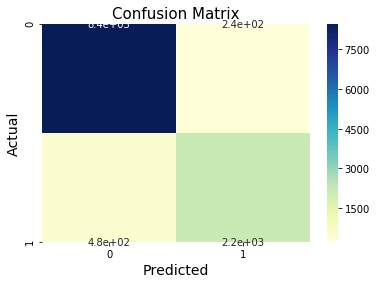

In [81]:
confusion_matrix_test = confusion_matrix(y_test,prediction)

sns.heatmap(confusion_matrix_test,annot=True,cmap="YlGnBu")
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted",fontsize=14)
plt.ylabel("Actual",fontsize=14)

In [76]:
y_test_binary = y_test.copy()
y_test_binary = y_test_binary.map({'<=50K': 0, '>50K': 1})

In [77]:
y_test_binary

ID
35415    0
7126     0
13842    0
8900     0
15691    1
        ..
16815    0
1775     1
41550    0
13599    0
12326    1
Name: Salary, Length: 11400, dtype: int64

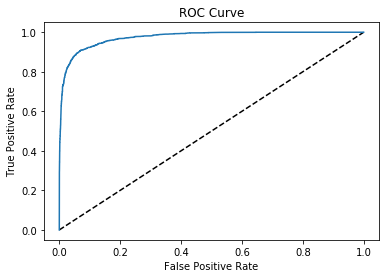

In [80]:
fpr, tpr, thresholds  = roc_curve(y_test_binary, predict_prob )

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Train the model using all dataset

In [82]:
final_X = pd.concat([final_X_train_label, final_X_test_label], axis=0)
final_y = pd.concat([y_train, y_test], axis=0)

In [84]:
final_pub_test_label

,Employment class,Marital status,Occupation,Relationship status,Race,Sex,Native country,Age,Fnlwgt,Education years,Capital gain,Capital loss,Work hours per week
ID,,,,,,,,,,,,,
21990,3,4,5,3,4,1,9,-1.062350,-0.479274,0.755942,-0.146805,-0.215815,-0.852289
6594,1,2,2,0,4,1,9,-0.770094,0.242314,-0.421391,-0.146805,-0.215815,-0.042684
18525,3,2,2,0,4,1,9,-0.112519,-0.115100,-0.421391,-0.146805,-0.215815,-0.042684
23747,3,2,11,0,4,1,9,2.006337,1.528029,-0.028946,-0.146805,-0.215815,-1.014210
37752,5,2,4,5,4,0,9,-0.331710,-1.259594,-0.421391,-0.146805,5.225514,-2.309577
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34891,3,0,0,4,4,0,9,0.910377,-0.703980,-0.028946,-0.146805,6.144472,-0.042684
15512,5,2,3,0,4,1,9,0.837313,-0.536650,1.933275,13.275973,-0.215815,0.766921
27426,3,4,7,3,4,1,9,-0.989286,0.209540,1.148386,-0.146805,-0.215815,-0.042684


In [86]:
final_rf = RandomForestClassifier(n_estimators=500, min_samples_leaf=1, max_features=1, max_depth=32)
final_rf.fit(final_X, final_y)

pred_test_prob = final_rf.predict_proba(final_pub_test_label)[:, 1]

result = pd.DataFrame({'ID': final_pub_test_label.index, 'Predicted': pred_test_prob})

result.to_csv("RandomForest.csv", index=False)

In [100]:
#Oversampling
from sklearn.utils import resample

sample_df = pd.concat([final_X, final_y], axis=1)

positive = sample_df[sample_df['Salary'] == '>50K']
negative = sample_df[sample_df['Salary'] == '<=50K']

positive_increase = resample(positive,
                              replace = True,
                              n_samples = len(negative),
                              random_state = 0)

increase_df = pd.concat([negative,positive_increase])
increase_df['Salary'].value_counts()

#Undersampling
positive_decrease = resample(negative,
                              replace = True,
                              n_samples = len(positive),
                              random_state = 111)
decrease_df = pd.concat([positive,positive_decrease])
decrease_df['Salary'].value_counts()

<=50K    9087
>50K     9087
Name: Salary, dtype: int64

In [103]:
y_oversample = increase_df['Salary']
X_oversample = increase_df.drop(['Salary'], axis=1)

y_undersample = decrease_df['Salary']
X_undersample = decrease_df.drop(['Salary'], axis=1)

In [105]:
from sklearn.model_selection import cross_val_score

over_scores = cross_val_score(RandomForestClassifier(random_state=0 ,n_estimators=500, min_samples_leaf=1, max_features=1, max_depth=32), X_oversample, y_oversample, scoring='roc_auc', cv=10)
print(over_scores.mean())

under_scores = cross_val_score(RandomForestClassifier(random_state=0 ,n_estimators=500, min_samples_leaf=1, max_features=1, max_depth=32), X_undersample, y_undersample, scoring='roc_auc', cv=10)
print(under_scores.mean())

0.9984001116193882
0.9756303134115007


Oversampling performs better than Undersampling

In [106]:
over_rf = RandomForestClassifier(n_estimators=500, min_samples_leaf=1, max_features=1, max_depth=32)
over_rf.fit(X_oversample, y_oversample)

pred_test_prob = over_rf.predict_proba(final_pub_test_label)[:, 1]

result = pd.DataFrame({'ID': final_pub_test_label.index, 'Predicted': pred_test_prob})

result.to_csv("RandomForestOverSampling.csv", index=False)